In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("16-diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [8]:
df['Insulin'].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

In [9]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#Bunların % kaçı sıfır onu görmek istiyoruz
columns_to_check = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentege = 100 * zero_count / len(df) #toplama böler
    print(f"{col}: {zero_count} and  % {zero_percentege:.2f}")

Glucose: 5 and  % 0.65
BloodPressure: 35 and  % 4.56
SkinThickness: 227 and  % 29.56
Insulin: 374 and  % 48.70
BMI: 11 and  % 1.43


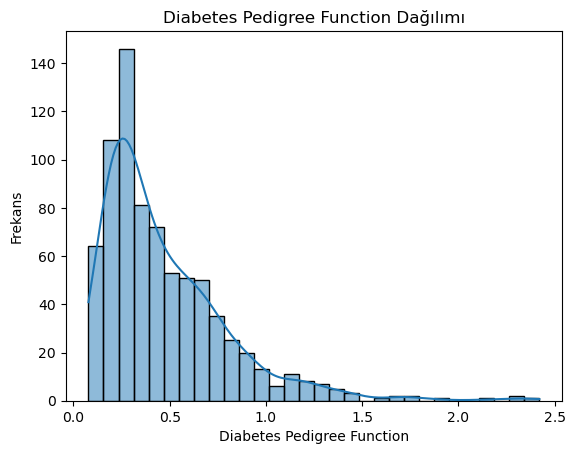

In [12]:
#EDA
sns.histplot(df['DiabetesPedigreeFunction'], bins=30, kde=True)
plt.title('Diabetes Pedigree Function Dağılımı')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frekans')
plt.show()

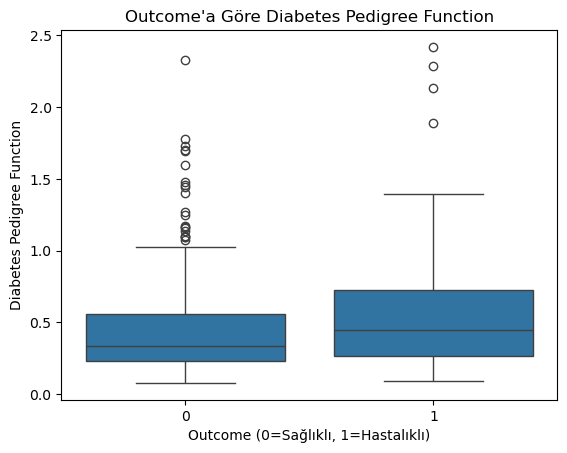

In [13]:
#Diyabet hastası olanlarla olmayanların genetik risk ortalamaları:
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df)
plt.title("Outcome'a Göre Diabetes Pedigree Function")
plt.xlabel("Outcome (0=Sağlıklı, 1=Hastalıklı)")
plt.ylabel("Diabetes Pedigree Function")
plt.show()

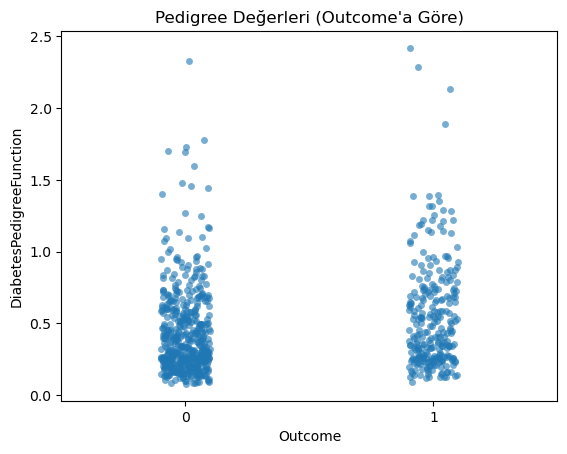

In [14]:
#Gerçek veri noktalarını Outcome bazında görelim
sns.stripplot(x="Outcome",y="DiabetesPedigreeFunction", data=df, jitter=True, alpha=0.6)
plt.title("Pedigree Değerleri (Outcome'a Göre)")
plt.show()

In [15]:
X = df.drop("Outcome", axis=1)
y=df["Outcome"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [18]:
#Medyanlarıyla dolduracağımız kolonları alalım:
columns_to_fill = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]


In [19]:
#Medyanlarını alacağız (Train için de Test için de):
medians = {} #medyanları kaydedeceğimiz bir dict oluşturalım

for col in columns_to_fill:
    medians_value = X_train[X_train[col] !=0][col].median() #0'a eşit olmayan rowların medyanını aldık
    medians[col] = medians_value
    X_train[col] = X_train[col].replace(0, medians_value) #0 olanları, 0'a eşit olmayan medyanlarla değiştirdik


#test için de bu işlemi yapacağız
for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0,medians[col]) #fit_transform, transform mantığındaki gibi

In [20]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [21]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.487013,29.376623,144.402597,32.483117,0.479565,33.064935
std,3.304818,32.320876,11.813495,10.513035,104.291511,6.946159,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,129.500000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [22]:
#Normalde ağaçla alakalı algoritmalarda Scaler kullanmaya gerek yok.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.58      0.63      0.60        46

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix
 [[87 21]
 [17 29]]
Accuracy Score: 0.7532467532467533


In [26]:
#HyperParameter Tuning yapabiliriz
from sklearn.model_selection import GridSearchCV

In [27]:
adaboost_param = {
    "n_estimators": [50, 70, 100, 120, 150, 200],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10]
}

In [28]:
grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=adaboost_param, cv=5, verbose=1 )

In [29]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 150, 200]},
             verbose=1)

In [30]:
grid.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [31]:
ada = AdaBoostClassifier(n_estimators=150, learning_rate=1)

In [32]:
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154

Confusion Matrix
 [[87 21]
 [16 30]]
Accuracy Score: 0.7597402597402597


### Other Classifier Models

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [38]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVC": SVC(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=150,learning_rate=1)
}

In [39]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test,y_pred2))
    print("Confusion Matrix\n:", confusion_matrix(y_test,y_pred2))
    print("Classification Report:", classification_report(y_test,y_pred2))


Random Forest
Accuracy: 0.7207792207792207
Confusion Matrix
: [[85 23]
 [20 26]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.79      0.80       108
           1       0.53      0.57      0.55        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.72      0.72       154


Logistic Regression
Accuracy: 0.7532467532467533
Confusion Matrix
: [[89 19]
 [19 27]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.59      0.59      0.59        46

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154


KNN
Accuracy: 0.6948051948051948
Confusion Matrix
: [[81 27]
 [20 26]]
Classification Report:               precision    recall  

In [40]:
for i in range(len(models)):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(model_name)

    print("Evaluation for Training Set")
    print("Accuracy:", train_acc)

    print("-------------------------------------------------")

    print("Evaluation for Test Set")
    print("Accuracy:", test_acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    print("-------------------------------------------------\n")


Random Forest
Evaluation for Training Set
Accuracy: 1.0
-------------------------------------------------
Evaluation for Test Set
Accuracy: 0.7207792207792207
Confusion Matrix:
 [[85 23]
 [20 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       108
           1       0.53      0.57      0.55        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.72      0.72       154

-------------------------------------------------

Logistic Regression
Evaluation for Training Set
Accuracy: 0.7833876221498371
-------------------------------------------------
Evaluation for Test Set
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[89 19]
 [19 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.59      0.59      0.59       

In [41]:
#Baktığımızda:
#1-Random Forest overfitting yaptı yani train datasını ezberlemiş. Random Forest ayarlanan ayarlarla fazla derin kalmış. OVERFIT.
#2-KNN beklenen davranışı verdi çünkü gürültüye duyarlıdır ve dataset küçükse çabuk bozulur.Zayıf genelleme yapmış. EN ZAYIFI
#3-Naive Bayes: Sağlıklı ama Logistic'in gerisinde. Overfitting yok, stabil ama zayıf kaldı.
#4-SVC: Dengeli çünkü train ve test yakın. OVerfitting yok. Genelleme iyi. Ortadır.
#5-Logistic Regression: Model daha stabil, overfitting yok. Model genelleme yapabiliyor. Adaboost'dan sonra en sağlıklı model.
#6-Adaboost Classifier: Overfitting yok. En yüksek test skoru. Hyperparameter tuning sonucuyla da en iyisi.


#“Ayarlanmış (hiperparametreleri optimize edilmiş) AdaBoost, en iyi genelleme performansını elde etti; 
#Logistic Regression ise güçlü ve istikrarlı bir başlangıç (baseline) modeli olarak görev yaptı.”



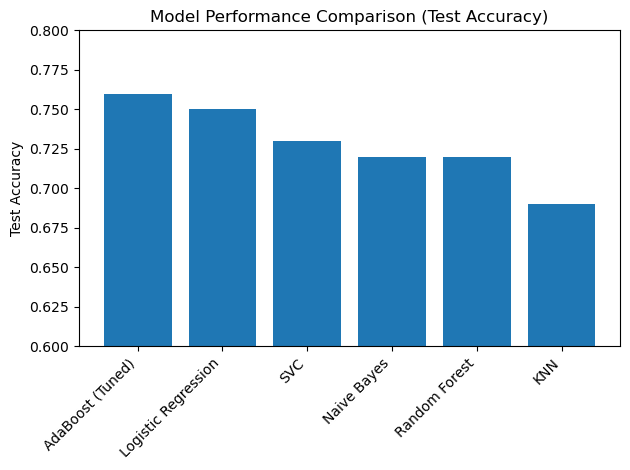

In [42]:
# Model isimleri (en iyiden en kötüye)
models = [
    "AdaBoost (Tuned)",
    "Logistic Regression",
    "SVC",
    "Naive Bayes",
    "Random Forest",
    "KNN"
]

# Test accuracy değerleri
test_accuracy = [0.76, 0.75, 0.73, 0.72, 0.72, 0.69]

# Grafik
plt.figure()
plt.bar(models, test_accuracy)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison (Test Accuracy)")
plt.ylim(0.6, 0.8)
plt.tight_layout()
plt.show()
